# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Data Loading & Basic Info

In [2]:
dataset_path = r'D:\FPT_Material\Sem 4\DAP391m\Fraud Detection Project\Fraud Detection Dataset\PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(dataset_path)

In [4]:
df.shape

(6362620, 11)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# 3. Data Wrangling

## 3.1 Handling missing values

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## 3.2 Handling duplicate values

In [9]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


# 4. EDA (Exploratory Data Analysis)

**Context**

This project aims to perform an Exploratory Data Analysis (EDA) on the synthetic PaySim dataset. The primary goal is to understand the characteristics, patterns, and differences between normal and fraudulent transactions.

The insights from this EDA will serve as a crucial foundation for feature engineering and selecting an appropriate Machine Learning model for the fraud detection task.

## 4.1. Descriptive Statistics

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673007,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502971,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112969,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.942094,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0


**Note:**

This table provides a descriptive statistical overview of a financial transaction dataset. The following are the key insights:

* **Transaction Types & Frequency**: 
    * The dataset contains **5 unique transaction types**.
    * The most frequent (`top`) transaction type is `CASH_OUT`, with 2,237,500 occurrences.

* **Transaction Amount Distribution**:
    * The `amount` of transactions varies significantly, with a mean of approximately **179,861**.
    * The standard deviation is very large (**603,858**), indicating a wide spread in transaction values.
    * The data ranges from a minimum of **0.0** to a maximum of over **92.4 million**.

* **Fraud Indicators (Highly Imbalanced Data)**:
    * The `isFraud` column has a mean of **0.001291**. This is a critical insight: it shows that only about **0.13%** of the transactions in this dataset are fraudulent. This extreme imbalance must be handled carefully during model training.
    * The `isFlaggedFraud` column has a mean of nearly **0**, indicating that this flag is set extremely rarely.

* **Data Completeness**:
    * All columns show a `count` of **6362620**, indicating that there are **no missing values** in this section of the dataset. This is excellent for data quality and simplifies preprocessing.

* **Account Balances**:
    * The `oldbalanceOrg` and `newbalanceOrig` columns show the changes in the originator's account balance, while `oldbalanceDest` and `newbalanceDest` show the changes for the recipient. Many transactions start with a zero balance in the destination account.

## 4.2. Variable Distribution Analysis (using Histograms & Density Plots)

In this section, our goal is to understand the distribution of individual variables. This helps us see the frequency of different values and identify the central tendency and skewness of the data.

### 4.2.1. Distribution of Categorical Variables
For categorical variables, a count plot serves as a histogram to show the frequency of each category.

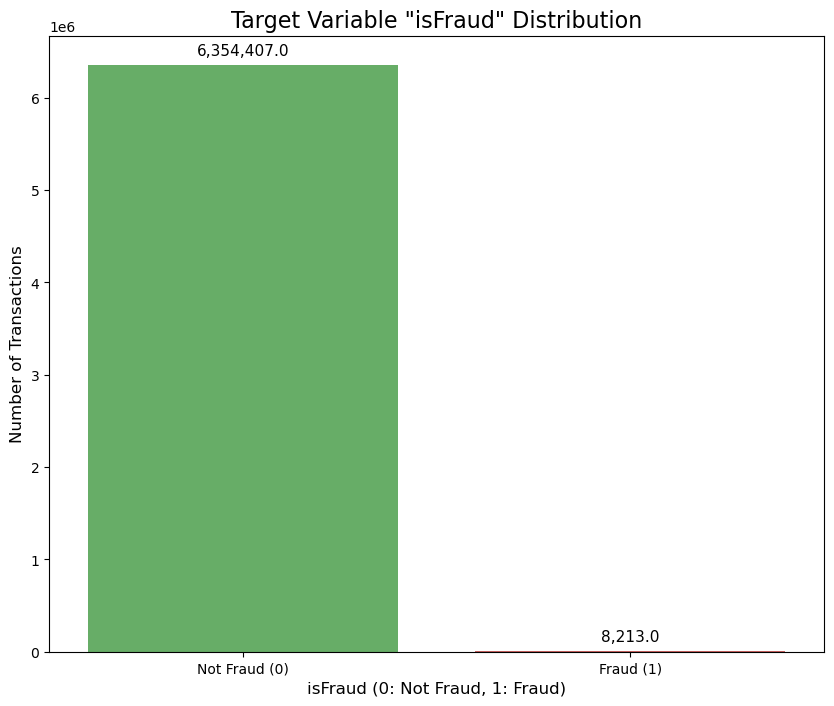

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(x='isFraud', data=df, palette=['#5cb85c', '#d9534f'])
plt.title('Target Variable "isFraud" Distribution', fontsize=16)
plt.xlabel('isFraud (0: Not Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

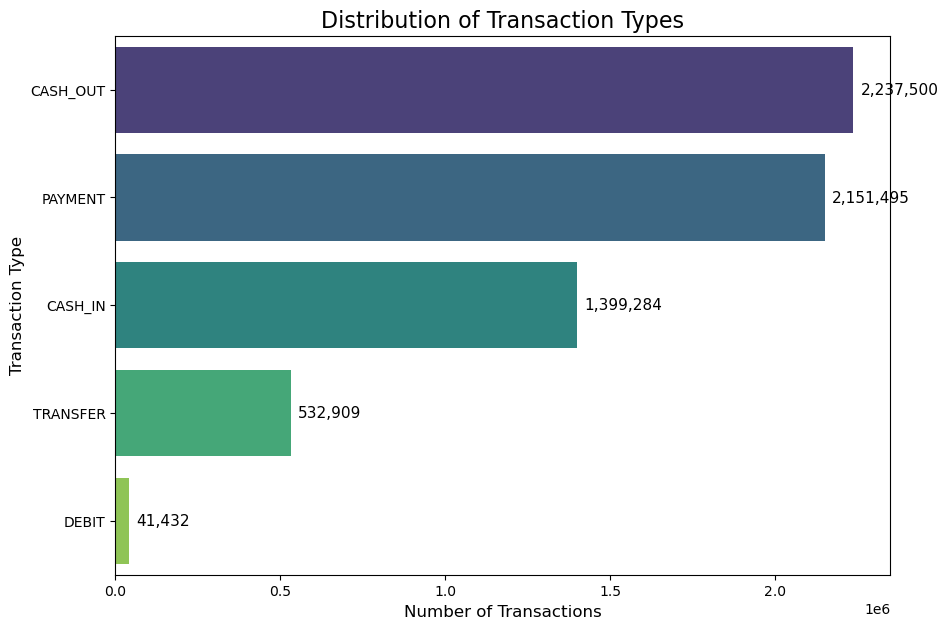

In [12]:
# Distribution of transaction type
plt.figure(figsize=(10, 7))
sns.countplot(y='type', data=df, order=df['type'].value_counts().index, palette='viridis')
plt.title('Distribution of Transaction Types', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Transaction Type', fontsize=12)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=11, color='black', xytext=(5, 0),
                textcoords='offset points')
plt.show()

### 4.2.2. Distribution of Numerical Variables
We will use histograms and density plots to visualize the distribution of key numerical variables.

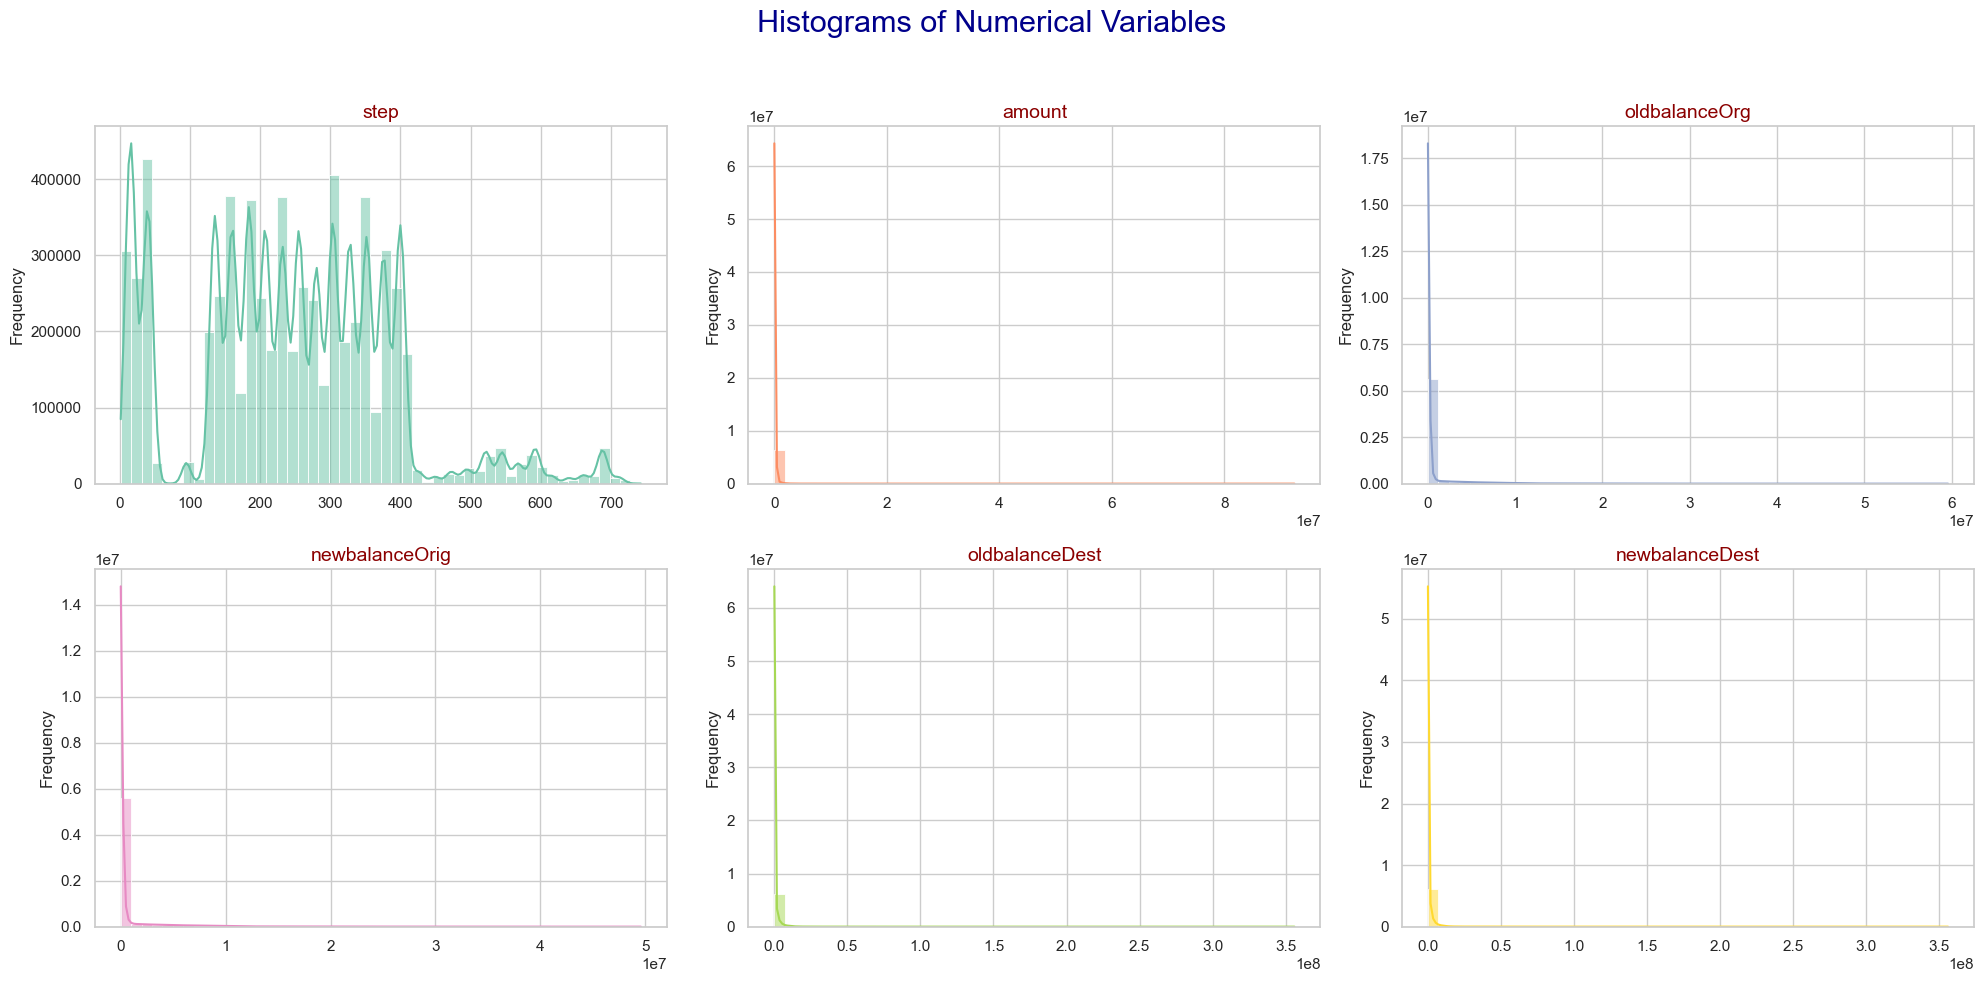

In [13]:
# Apply Seaborn theme for overall aesthetics
sns.set_theme(style="whitegrid", palette="pastel")

# List of numerical columns to plot
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Custom color palette
colors = sns.color_palette("Set2", len(numerical_cols))

# Create histograms for each numerical variable with colorful plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Histograms of Numerical Variables', fontsize=22, color='darkblue')

for ax, col, color in zip(axes.flatten(), numerical_cols, colors):
    sns.histplot(df[col], bins=50, ax=ax, kde=True, color=color)
    ax.set_title(col, fontsize=14, color='darkred')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

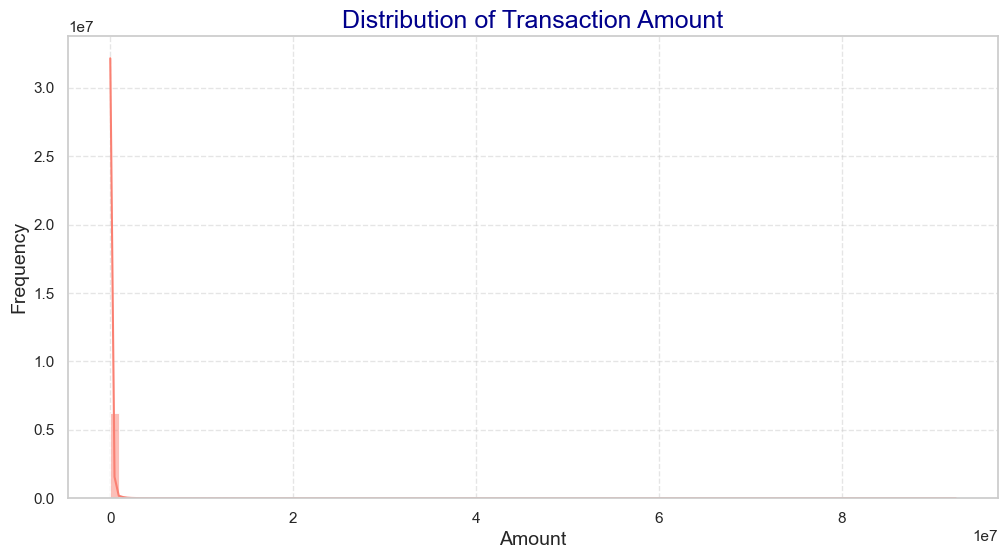

In [14]:
# A closer look at the 'amount' distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['amount'], bins=100, kde=True, color='salmon')
plt.title('Distribution of Transaction Amount', fontsize=18, color='darkblue')
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

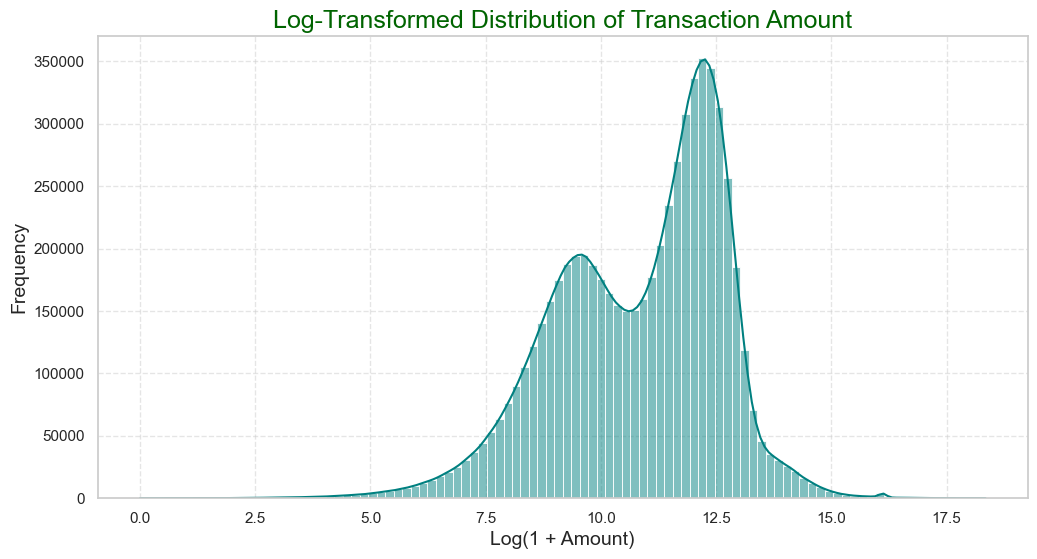

In [15]:
# Log-transformed distribution to handle skewness
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='teal')
plt.title('Log-Transformed Distribution of Transaction Amount', fontsize=18, color='darkgreen')
plt.xlabel('Log(1 + Amount)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 4.3. Outlier Analysis (using Box Plots)

Box plots are excellent for identifying the spread of data and detecting potential outliers. We will use them to compare the distributions of numerical variables across different categories.

### 4.3.1. Outlier Detection in Transaction Amount

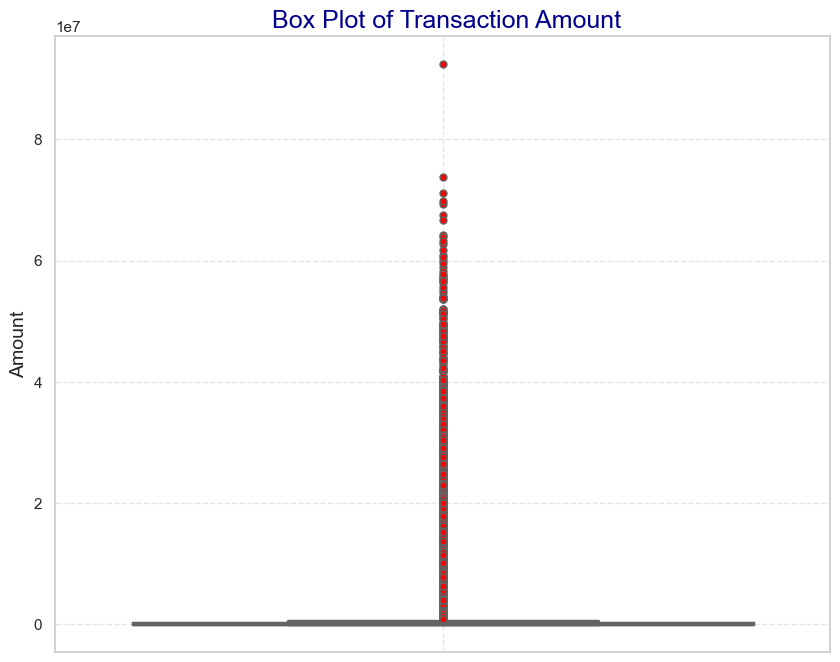

In [16]:
# Box plot with colorful styling
plt.figure(figsize=(10, 8))
sns.boxplot(
    y=df['amount'],
    color='orchid',               # Vibrant color for the box
    linewidth=2.5,                # Bold edges
    fliersize=3,                  # Size of outlier markers
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
)

plt.title(' Box Plot of Transaction Amount', fontsize=18, color='darkblue')
plt.ylabel('Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 4.3.2. Comparing Distributions with Box Plots

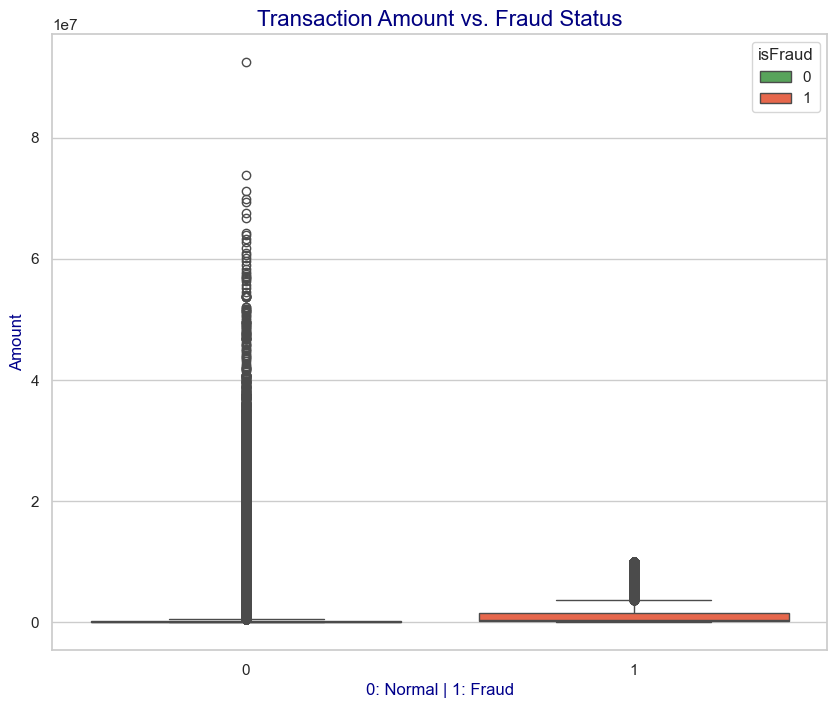

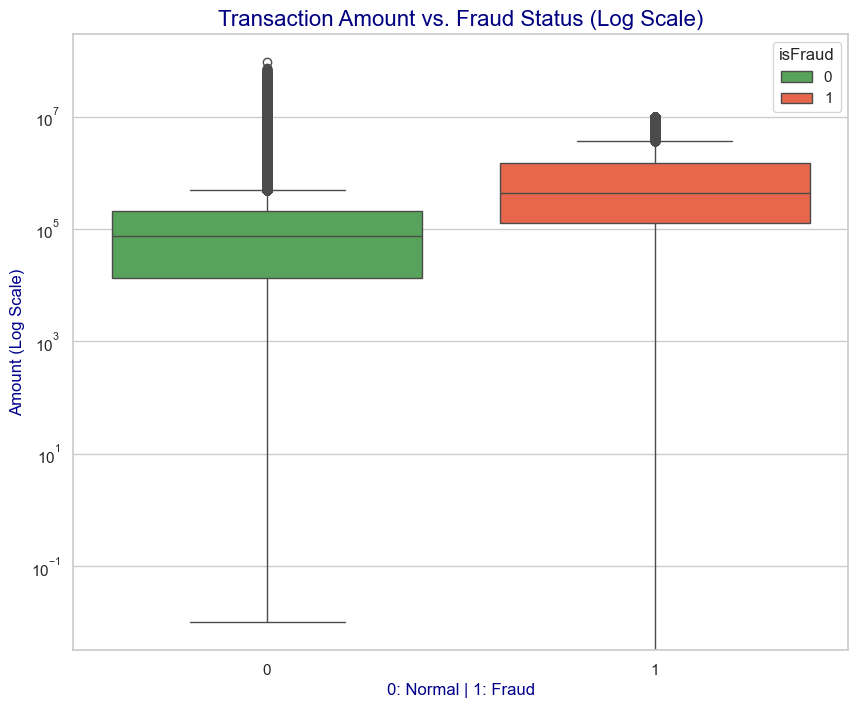

In [17]:
# Define a vibrant color palette for the first plot
fraud_palette = ['#4CAF50', '#FF5733']  # Green for Normal, Red for Fraud

# Comparing 'amount' for fraudulent vs. normal transactions (Original Scale)
plt.figure(figsize=(10, 8))
sns.boxplot(x='isFraud', y='amount', hue='isFraud', data=df, palette=fraud_palette)
plt.title('Transaction Amount vs. Fraud Status', fontsize=16, color='navy')
plt.xlabel('0: Normal | 1: Fraud', fontsize=12, color='darkblue')
plt.ylabel('Amount', fontsize=12, color='darkblue')
plt.show()

# Comparing 'amount' vs. Fraud Status (Log Scale)
plt.figure(figsize=(10, 8))
sns.boxplot(x='isFraud', y='amount', hue='isFraud', data=df, palette=fraud_palette)
plt.title('Transaction Amount vs. Fraud Status (Log Scale)', fontsize=16, color='navy')
plt.xlabel('0: Normal | 1: Fraud', fontsize=12, color='darkblue')
plt.ylabel('Amount (Log Scale)', fontsize=12, color='darkblue')
plt.yscale('log')
plt.show()

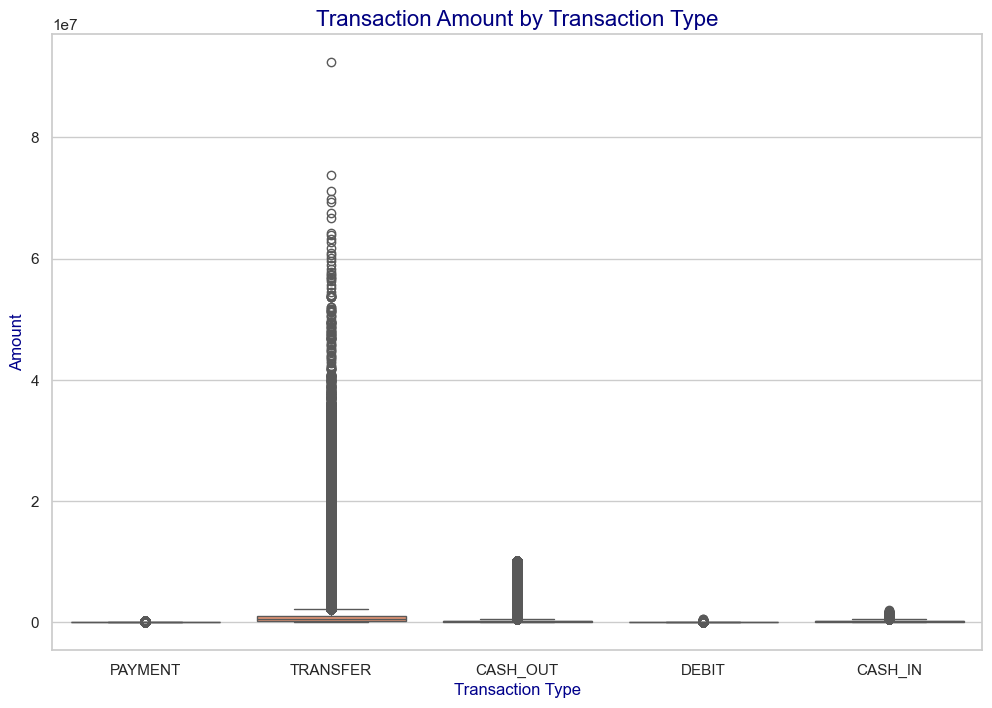

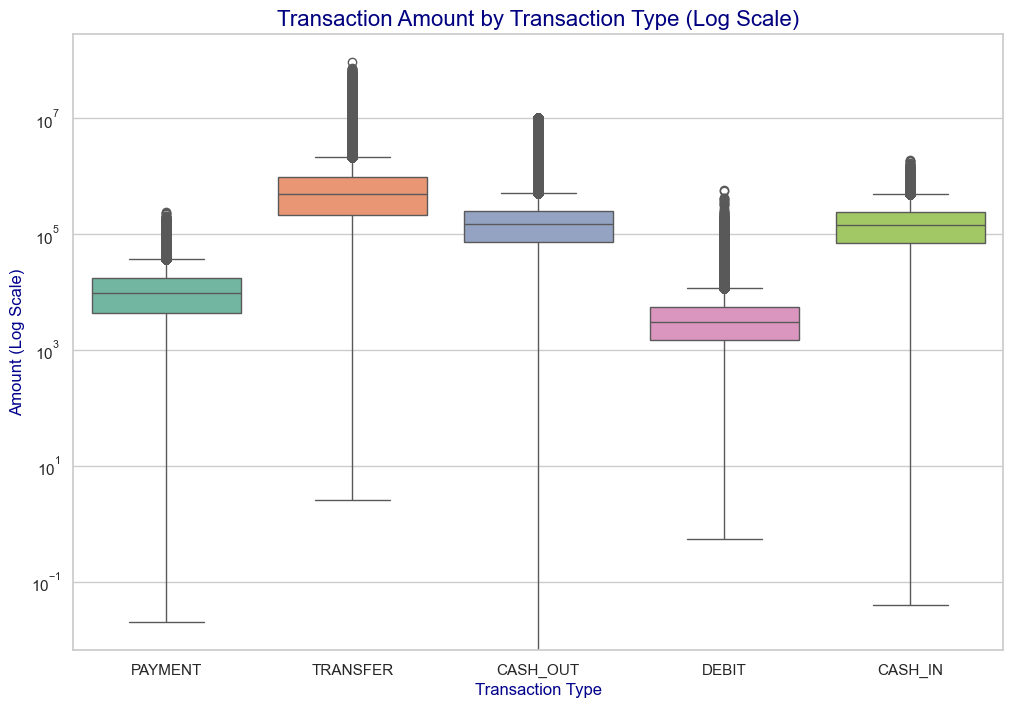

In [18]:
# Define a vibrant color palette for different transaction types
type_palette = sns.color_palette('Set2', n_colors=len(df['type'].unique()))  # Vibrant, distinct colors for each type

# Comparing 'amount' across different transaction types (Original Scale)
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='amount', hue='type', data=df, palette=type_palette)
plt.title('Transaction Amount by Transaction Type', fontsize=16, color='navy')
plt.xlabel('Transaction Type', fontsize=12, color='darkblue')
plt.ylabel('Amount', fontsize=12, color='darkblue')
plt.show()

# Comparing 'amount' across different transaction types (Log Scale)
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='amount', hue='type', data=df, palette=type_palette)
plt.title('Transaction Amount by Transaction Type (Log Scale)', fontsize=16, color='navy')
plt.xlabel('Transaction Type', fontsize=12, color='darkblue')
plt.ylabel('Amount (Log Scale)', fontsize=12, color='darkblue')
plt.yscale('log')
plt.show()

## 4.4. Relationship and Correlation Analysis

Here, we will explore how variables relate to each other. A correlation heatmap gives a high-level overview of linear relationships, while scatter plots allow for a more detailed look at the relationship between two specific variables.

### 4.4.1. Correlation Between Numerical Variables (Correlation Heatmap)

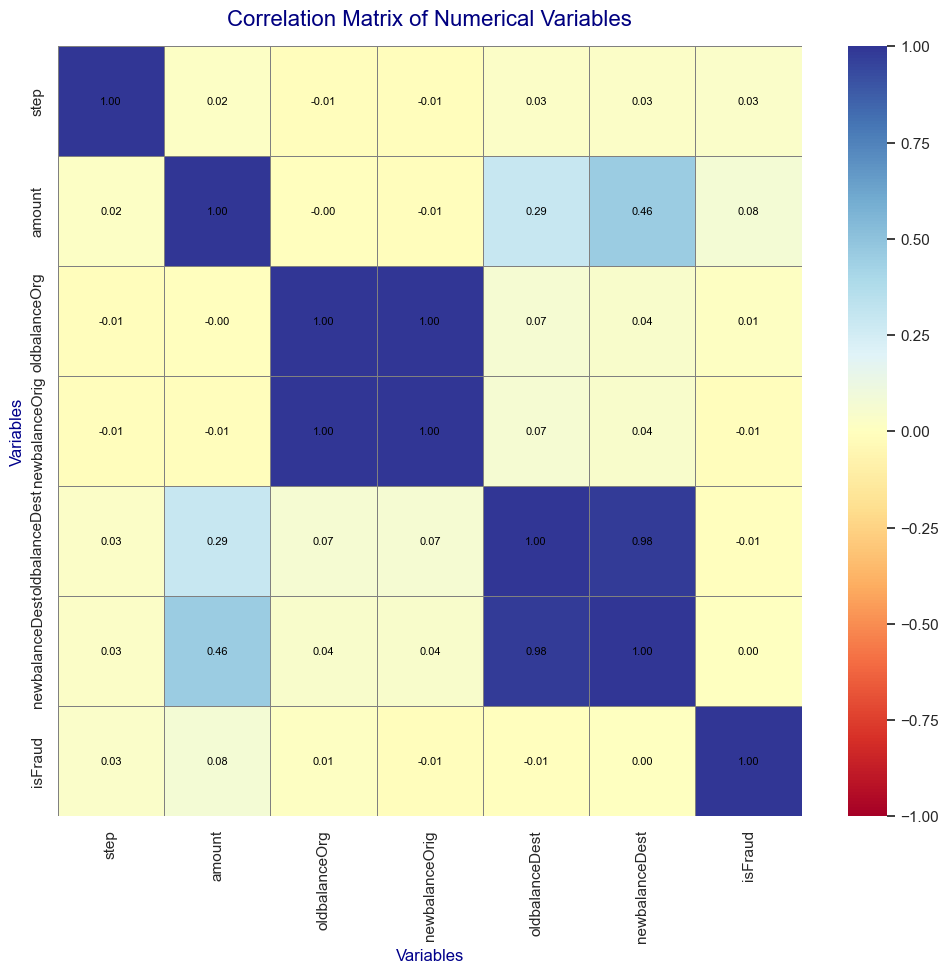

In [19]:
# Calculate the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols + ['isFraud']].corr()

# Create heatmap with a vibrant colormap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation values
    cmap='RdYlBu',  # Vibrant colormap (Red-Yellow-Blue)
    fmt='.2f',  # Format to 2 decimal places
    vmin=-1,  # Anchor colormap at -1
    vmax=1,  # for full correlation range
    center=0,   # Center colormap at 0
    annot_kws={'size': 8, 'color': 'black'},  # Black annotations for readability
    linewidths=0.5,  # Add subtle grid lines
    linecolor='gray'   # Gray grid lines
)

plt.title('Correlation Matrix of Numerical Variables', fontsize=16, color='navy', pad=15)
plt.xlabel('Variables', fontsize=12, color='darkblue')
plt.ylabel('Variables', fontsize=12, color='darkblue')
plt.show()

### 4.4.2. "Fraud Status by Transaction Type (type vs isFraud)" & "type_fraud_pivot Table" & "Fraud Rates per Transaction Type (%) Chart

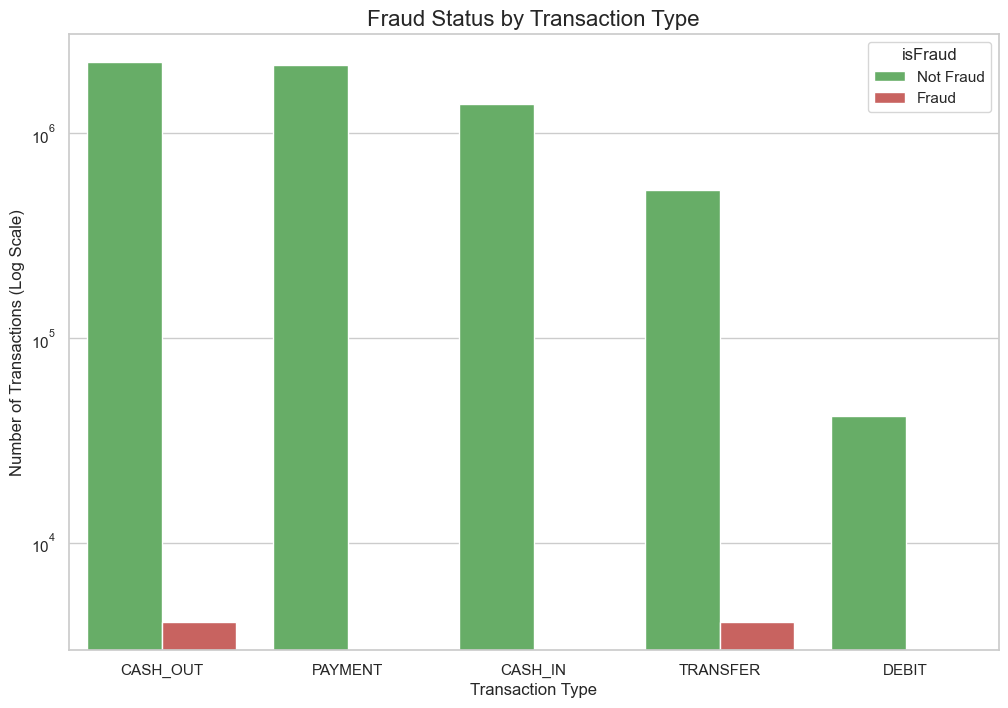

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Fraud Rates by Transaction Type (%):
 isFraud            0         1
type                          
CASH_IN   100.000000  0.000000
CASH_OUT   99.816045  0.183955
DEBIT     100.000000  0.000000
PAYMENT   100.000000  0.000000
TRANSFER   99.231201  0.768799
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


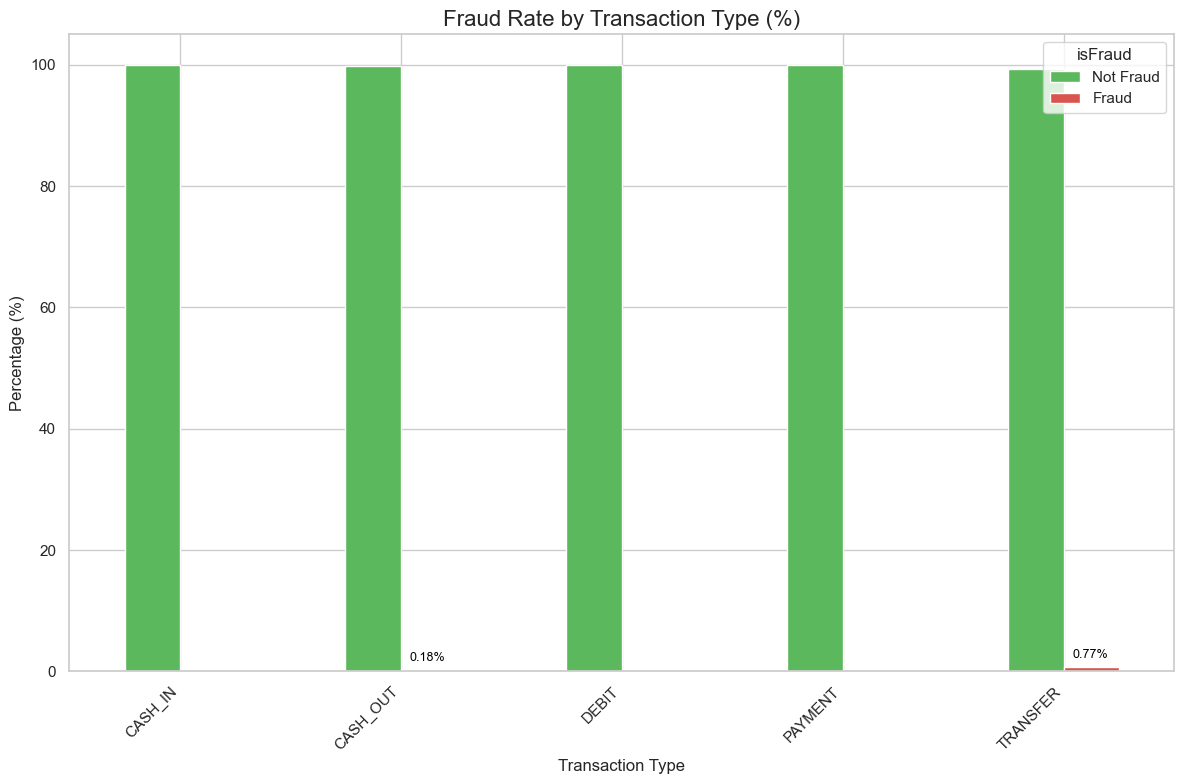

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(x='type', hue='isFraud', data=df, order=df['type'].value_counts().index, palette={0: '#5cb85c', 1: '#d9534f'})
plt.title('Fraud Status by Transaction Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of Transactions (Log Scale)', fontsize=12)
plt.yscale('log')
plt.legend(title='isFraud', labels=['Not Fraud', 'Fraud'])
plt.show()

print("-" * 100 + "\n" + "-" * 100)

type_fraud_pivot = pd.crosstab(df['type'], df['isFraud'], normalize='index') * 100
print("\nFraud Rates by Transaction Type (%):\n", type_fraud_pivot)

print("-" * 100 + "\n" + "-" * 100)

type_fraud_pivot.plot(kind='bar', stacked=False, figsize=(12, 8), color=['#5cb85c', '#d9534f'])
plt.title('Fraud Rate by Transaction Type (%)', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='isFraud', labels=['Not Fraud', 'Fraud'])
for i, type_name in enumerate(type_fraud_pivot.index):
    fraud_percentage = type_fraud_pivot.loc[type_name, 1]
    non_fraud_percentage = type_fraud_pivot.loc[type_name, 0]
    if fraud_percentage > 0:
        plt.text(i + 0.12, fraud_percentage + 1, f'{fraud_percentage:.2f}%', color='black', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### 4.4.3. General Distribution of the "step" Feature and Its Relationship with Fraud

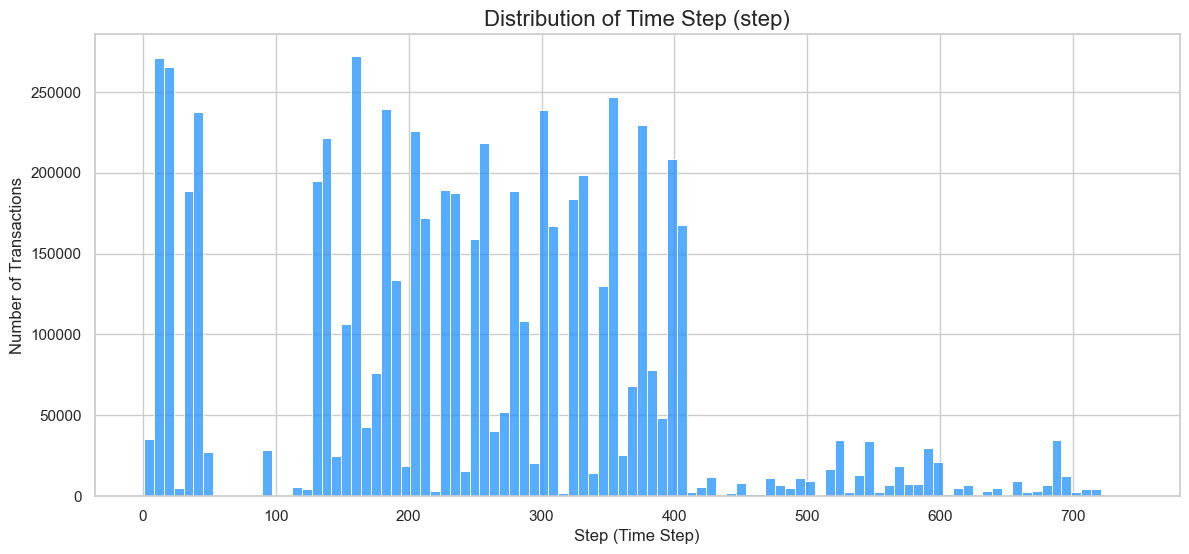

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


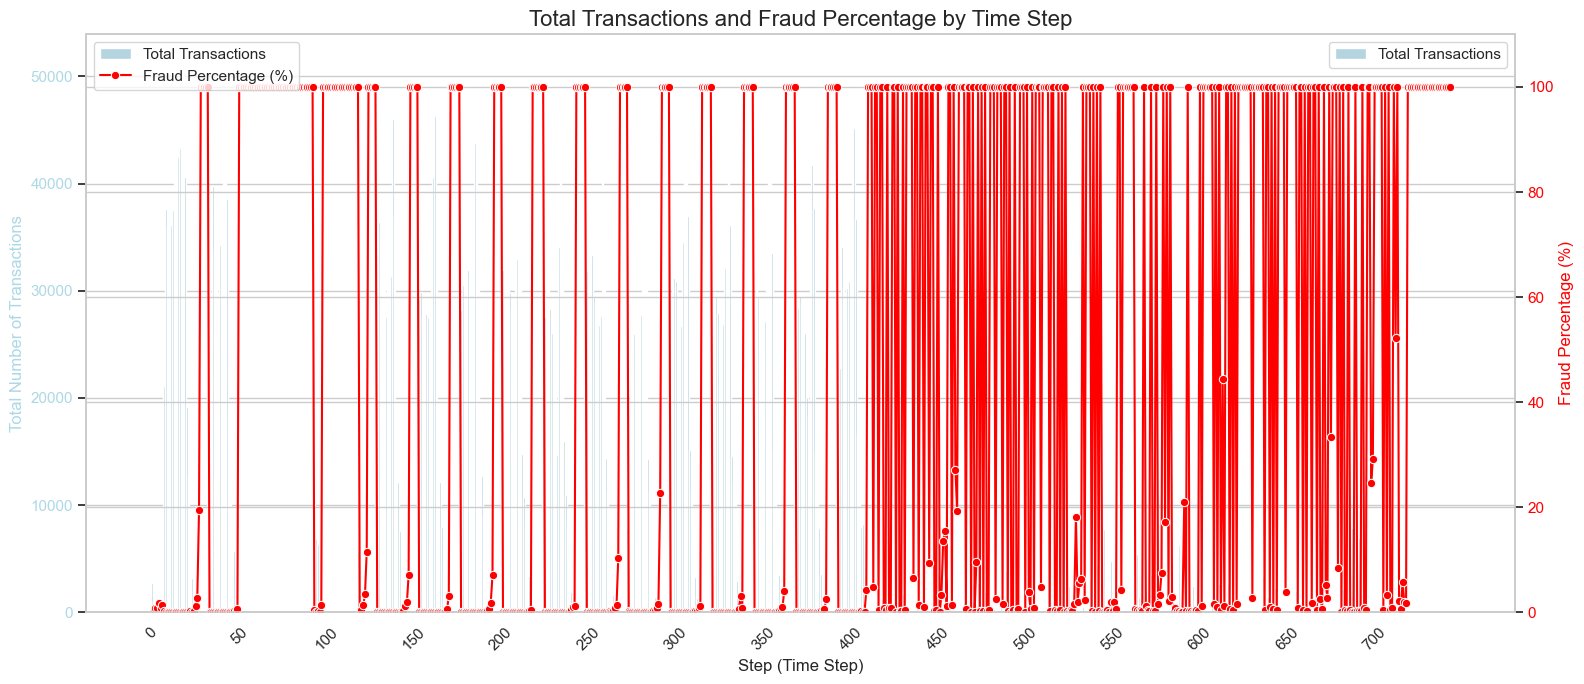

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


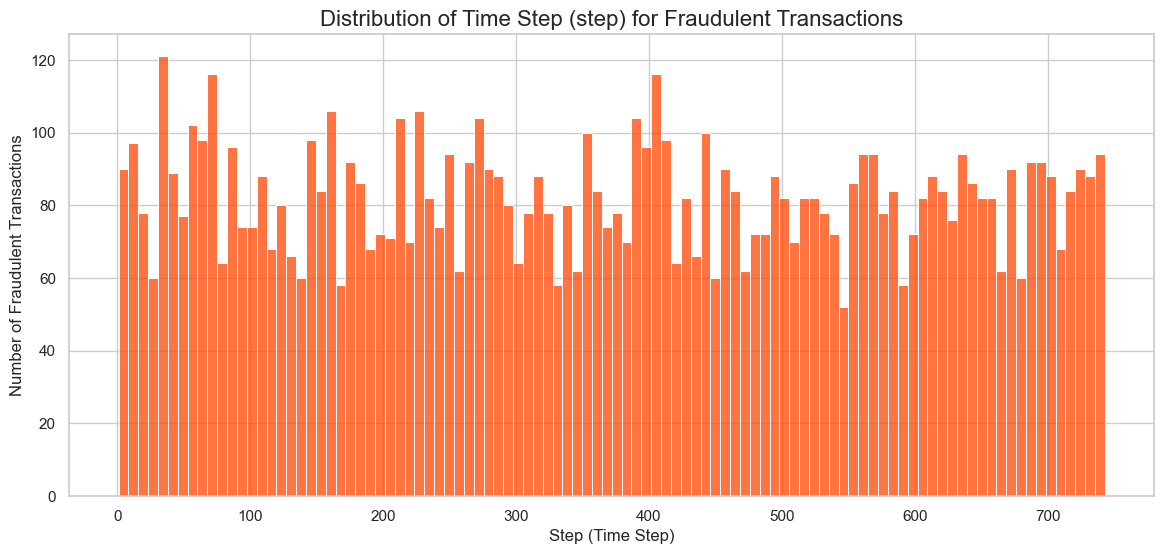

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [21]:
plt.figure(figsize=(14, 6))
sns.histplot(df['step'], bins=100, kde=False, color='dodgerblue')
plt.title('Distribution of Time Step (step)', fontsize=16)
plt.xlabel('Step (Time Step)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

# Total and fraudulent transaction count by step
step_analysis = df.groupby('step').agg(
    total_transactions=('isFraud', 'count'),
    fraud_transactions=('isFraud', 'sum')
).reset_index()

step_analysis['fraud_percentage'] = (step_analysis['fraud_transactions'] / step_analysis['total_transactions']) * 100

fig, ax1 = plt.subplots(figsize=(16, 7))

# Bar plot for total transactions
sns.barplot(x='step', y='total_transactions', data=step_analysis, color='lightblue', ax=ax1, label='Total Transactions')
ax1.set_xlabel('Step (Time Step)', fontsize=12)
ax1.set_ylabel('Total Number of Transactions', fontsize=12, color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
tick_spacing = 50
ax1.set_xticks(range(0, df['step'].max() + 1, tick_spacing))
ax1.set_xticklabels(range(0, df['step'].max() + 1, tick_spacing), rotation=45)

print("-" * 100 + "\n" + "-" * 100)

# Line plot for fraud percentage (secondary y-axis)
ax2 = ax1.twinx()
sns.lineplot(x='step', y='fraud_percentage', data=step_analysis, color='red', ax=ax2, marker='o', label='Fraud Percentage (%)')
ax2.set_ylabel('Fraud Percentage (%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(step_analysis['fraud_percentage'].dropna()) * 1.1 if not step_analysis['fraud_percentage'].dropna().empty else 1)

plt.title('Total Transactions and Fraud Percentage by Time Step', fontsize=16)
fig.tight_layout()

# Merge legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

print("-" * 100 + "\n" + "-" * 100)

# Distribution of step for only fraudulent transactions
plt.figure(figsize=(14, 6))
sns.histplot(df[df['isFraud'] == 1]['step'], bins=100, kde=False, color='orangered')
plt.title('Distribution of Time Step (step) for Fraudulent Transactions', fontsize=16)
plt.xlabel('Step (Time Step)', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.show()

print("-" * 100 + "\n" + "-" * 100)

### 4.4.4. "isFlaggedFraud" Analysis

In [22]:
print("Relationship Between isFlaggedFraud and isFraud (Contingency Table):")
print(pd.crosstab(df['isFlaggedFraud'], df['isFraud']))

print("-" * 100 + "\n" + "-" * 100)

print("\nDetails of Transactions with isFlaggedFraud == 1:")
flagged_fraud_details = df[df['isFlaggedFraud'] == 1]
print(flagged_fraud_details[['step', 'type', 'amount', 'isFraud']])  # Show only relevant columns
print(f"\nA total of {len(flagged_fraud_details)} transactions are flagged as isFlaggedFraud == 1.")
print(f"Out of these {len(flagged_fraud_details)} transactions, {flagged_fraud_details['isFraud'].sum()} are actually fraudulent (isFraud == 1).")

print("-" * 100 + "\n" + "-" * 100)

# Are all transactions with isFlaggedFraud == 1 of type TRANSFER?
if not flagged_fraud_details.empty:
    print(f"Transaction types for isFlaggedFraud == 1:\n{flagged_fraud_details['type'].value_counts()}")

Relationship Between isFlaggedFraud and isFraud (Contingency Table):
isFraud               0     1
isFlaggedFraud               
0               6354407  8197
1                     0    16
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Details of Transactions with isFlaggedFraud == 1:
         step      type       amount  isFraud
2736446   212  TRANSFER   4953893.08        1
3247297   250  TRANSFER   1343002.08        1
3760288   279  TRANSFER    536624.41        1
5563713   387  TRANSFER   4892193.09        1
5996407   425  TRANSFER  10000000.00        1
5996409   425  TRANSFER   9585040.37        1
6168499   554  TRANSFER   3576297.10        1
6205439   586  TRANSFER    353874.22        1
6266413   617  TRANSFER   2542664.27        1
6281482   646  TRANSFER  10000000.00        1
6281484   646  TRANSFER    399045.08        1
629601

# 5. Data Preparation & Feature Engineering

## 5.1. Introduction
Raw data is rarely in a suitable format for machine learning models. This phase, often the most time-consuming, involves cleaning, transforming, and enriching the data to create a high-quality dataset for modeling. Our goal is to convert the cleaned data from the EDA phase into a set of numerical features that a machine learning model can learn from effectively.

We will follow a structured process:
1.  **Data Cleaning:** Final checks and handling of complex issues like outliers.
2.  **Feature Engineering:** Creatively building new, informative features from existing data.
3.  **Data Transformation:** Encoding and scaling the features.
4.  **Feature Selection:** Choosing the final set of features for the model.

In [3]:
# We'll continue with the 'df' DataFrame from our EDA.
# It's good practice to create a copy to work on for this phase.
prep_df = df.copy()
print("Working DataFrame created. Shape:", prep_df.shape)

Working DataFrame created. Shape: (6362620, 11)


## 5.2. Data Cleaning

From our EDA, we know the dataset is quite clean (no missing `NaN` values, no duplicates). The primary remaining concern is handling outliers.

### 5.2.1. Handling Outliers

In [4]:
# Let's re-examine the 'amount' column's statistics
print(prep_df['amount'].describe())

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


**Strategy Discussion:**

The `amount` column has extreme outliers (the max value is vastly larger than the 75th percentile). In many problems, we might cap or remove these outliers.

However, in **fraud detection**, the most extreme transactions are often the most interesting and could be legitimate fraudulent cases. Removing them could cause our model to miss the very patterns it's supposed to detect.

**Decision:**
- We will **keep the outliers** for now.
- We will rely on tree-based models (like Decision Trees, Random Forest, XGBoost) which are generally robust to outliers.
- If using distance-based or linear models (like SVM or Logistic Regression), using a `RobustScaler` (which scales based on quartiles) would be a better choice than `StandardScaler`. For this demonstration, we will proceed with `StandardScaler` but acknowledge this limitation.

## 5.3. Feature Engineering

This is a creative and crucial step. We will use our domain knowledge and insights from the EDA to create new, more informative features.

### 5.3.1. Domain-Specific Features
Based on our EDA, we suspect that errors in account balances and attempts to empty an account are strong indicators of fraud.

In [5]:
# Feature 1: Error in Sender's Balance
# This should ideally be 0. A non-zero value indicates something is wrong.
prep_df['errorBalanceOrig'] = prep_df['newbalanceOrig'] + prep_df['amount'] - prep_df['oldbalanceOrg']

# Feature 2: Error in Recipient's Balance
prep_df['errorBalanceDest'] = prep_df['oldbalanceDest'] + prep_df['amount'] - prep_df['newbalanceDest']

# Feature 3: Indicator for an attempt to empty an account
# A value of 1 indicates the full balance was transferred.
prep_df['emptiedAccountOrig'] = (prep_df['oldbalanceOrg'] - prep_df['amount'] == 0).astype(int)

print("Newly engineered features:")
display(prep_df[['errorBalanceOrig', 'errorBalanceDest', 'emptiedAccountOrig']].head())

Newly engineered features:


,errorBalanceOrig,errorBalanceDest,emptiedAccountOrig
0,0.0,9839.64,0
1,0.0,1864.28,0
2,0.0,181.00,1
3,0.0,21363.00,1
4,0.0,11668.14,0


### 5.3.2. Time-Based Features

Fraudulent activities can often exhibit temporal patterns. For instance, fraudsters might operate during specific hours when users are less likely to be monitoring their accounts. Let's create new features from the `step` column to capture these potential patterns.

In [6]:
# a) Hour of the Day
# We assume that 'step' represents an hourly time interval (1 step = 1 hour).
# We use the modulo operator to get the hour within a 24-hour cycle.
prep_df['hour_of_day'] = prep_df['step'] % 24

# b) High-Risk Period Flag
# From EDA, we might observe that fraud rates increase in later stages of the simulation.
# We can create a binary flag for these periods. This is a simple way to capture non-linear trends.
RISK_THRESHOLD_STEP = 400 # This threshold can be tuned as a hyperparameter.
prep_df['is_high_risk_step_period'] = (prep_df['step'] > RISK_THRESHOLD_STEP).astype(int)

print("First few rows of the new time-based features:")
display(prep_df[['step', 'hour_of_day', 'is_high_risk_step_period', 'isFraud']].head())

First few rows of the new time-based features:


,step,hour_of_day,is_high_risk_step_period,isFraud
0,1,1,0,0
1,1,1,0,0
2,1,1,0,1
3,1,1,0,1
4,1,1,0,0


#### Analyzing the New Time-Based Features

Now, let's visualize these new features to see if they have a relationship with our target variable, `isFraud`.

Analyzing Fraud Distribution by Hour of the Day:


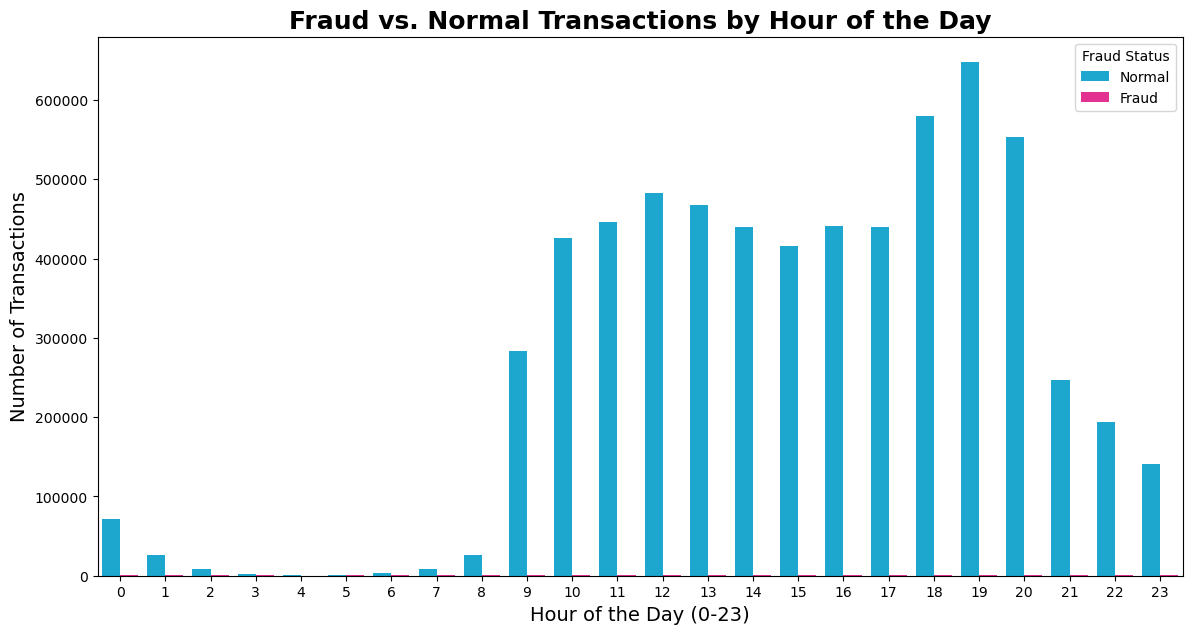


----------------------------------------------------------------------------------------------------

Analyzing Fraud Distribution by High-Risk Time Period:
Fraud Rate (%) in each period:
isFraud                           0         1
is_high_risk_step_period                     
0                         99.922637  0.077363
1                         99.350927  0.649073


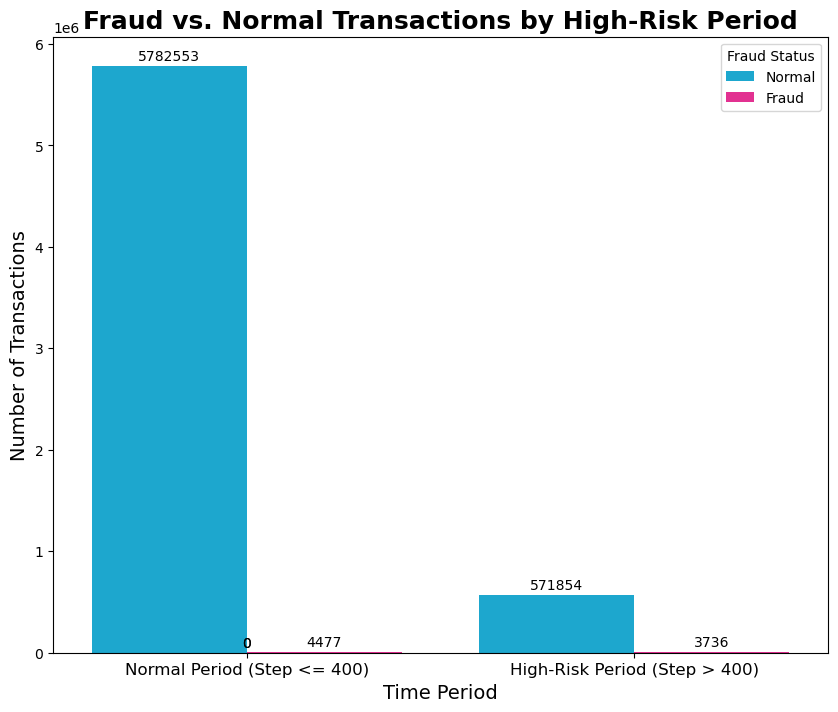

In [7]:
# Define a more vibrant binary color palette
palette_binary = ['#00B7EB', '#FF1493']  # Vivid Cyan for Normal, Neon Pink for Fraud

# Define the helper function to add annotations on bars
def show_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 2),
            textcoords='offset points'
        )

# Analyzing hour_of_day vs isFraud
print("Analyzing Fraud Distribution by Hour of the Day:")
plt.figure(figsize=(14, 7))
sns.countplot(x='hour_of_day', hue='isFraud', data=prep_df, palette=palette_binary)
plt.title('Fraud vs. Normal Transactions by Hour of the Day', fontsize=18, weight='bold')
plt.xlabel('Hour of the Day (0-23)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.legend(title='Fraud Status', labels=['Normal', 'Fraud'])
plt.show()

print("\n" + "-"*100 + "\n")

# Analyzing is_high_risk_step_period vs isFraud
print("Analyzing Fraud Distribution by High-Risk Time Period:")

# First, let's see the fraud rate in each period
print("Fraud Rate (%) in each period:")
print(pd.crosstab(prep_df['is_high_risk_step_period'], prep_df['isFraud'], normalize='index') * 100)

# Now, let's visualize the counts
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='is_high_risk_step_period', hue='isFraud', data=prep_df, palette=palette_binary)
plt.title('Fraud vs. Normal Transactions by High-Risk Period', fontsize=18, weight='bold')
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks([0, 1], [f'Normal Period (Step <= {RISK_THRESHOLD_STEP})', f'High-Risk Period (Step > {RISK_THRESHOLD_STEP})'], fontsize=12)
plt.legend(title='Fraud Status', labels=['Normal', 'Fraud'])

# Use the helper function to add annotations on the bars
show_values_on_bars(ax)
plt.show()

## 5.4. Data Transformation

Now we will convert our dataset into a purely numerical format suitable for modeling. This involves encoding categorical variables and scaling numerical features.

### 5.4.1. Encoding Categorical Variables
The `type` column is categorical. We will use One-Hot Encoding to convert it into numerical format, creating a new binary column for each category.

In [8]:
# Apply one-hot encoding to the 'type' column
type_dummies = pd.get_dummies(prep_df['type'], prefix='type')

# Concatenate the new dummy variables with the dataframe
prep_df = pd.concat([prep_df, type_dummies], axis=1)

print("DataFrame after One-Hot Encoding:")
display(prep_df.head())

DataFrame after One-Hot Encoding:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,errorBalanceOrig,errorBalanceDest,emptiedAccountOrig,hour_of_day,is_high_risk_step_period,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,0.0,9839.64,0,1,0,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,0.0,1864.28,0,1,0,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,0.0,181.00,1,1,0,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,0.0,21363.00,1,1,0,False,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,0.0,11668.14,0,1,0,False,False,False,True,False


### 5.4.2. Splitting Data into Training and Testing Sets
**This is the most critical step before scaling.** We must split our data first to prevent "data leakage," where information from the test set inadvertently influences the training process (e.g., the scaler learns the mean/std of the entire dataset).

In [9]:
# Define features (X) and target (y)
X = prep_df.drop('isFraud', axis=1)
y = prep_df['isFraud']

# Split the data (e.g., 80% train, 20% test)
# Using stratify=y is crucial for imbalanced datasets to maintain the same class distribution in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5090096, 20)
Testing set shape: (1272524, 20)



Distribution of isFraud (0: Normal, 1: Fraud):

Original Dataset:
isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

Training Set:
isFraud
0    5083526
1       6570
Name: count, dtype: int64
isFraud
0    99.870926
1     0.129074
Name: proportion, dtype: float64

Testing Set:
isFraud
0    1270881
1       1643
Name: count, dtype: int64
isFraud
0    99.870887
1     0.129113
Name: proportion, dtype: float64


C:\Users\Hii\AppData\Local\Temp\ipykernel_7744\3883508021.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=palette_binary)
C:\Users\Hii\AppData\Local\Temp\ipykernel_7744\3883508021.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette=palette_binary)
C:\Users\Hii\AppData\Local\Temp\ipykernel_7744\3883508021.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette=palette_binary)


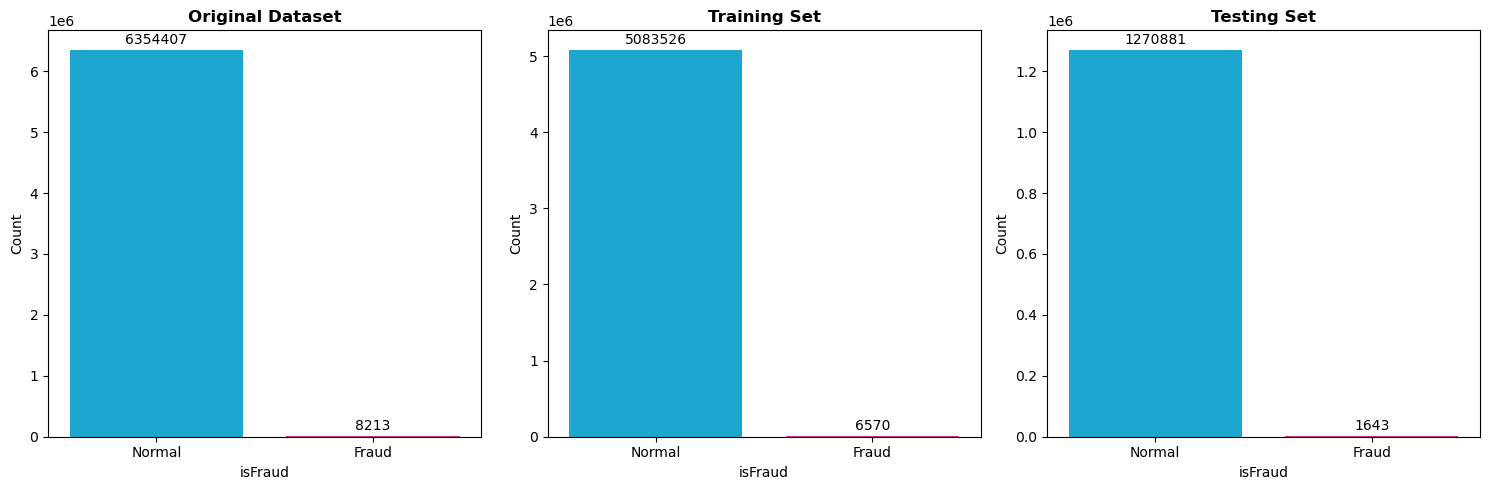

In [10]:
# Print distribution of isFraud
print("\nDistribution of isFraud (0: Normal, 1: Fraud):")
print("\nOriginal Dataset:")
print(pd.Series(y).value_counts())
print(pd.Series(y).value_counts(normalize=True) * 100)

print("\nTraining Set:")
print(pd.Series(y_train).value_counts())
print(pd.Series(y_train).value_counts(normalize=True) * 100)

print("\nTesting Set:")
print(pd.Series(y_test).value_counts())
print(pd.Series(y_test).value_counts(normalize=True) * 100)

# Define the helper function to add annotations on bars
def show_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 2),
            textcoords='offset points'
        )

# Visualize the distribution
# Define vibrant binary color palette
palette_binary = ['#00B7EB', '#FF1493']  # Cyan for Normal, Neon Pink for Fraud

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Original dataset
plt.subplot(1, 3, 1)
sns.countplot(x=y, palette=palette_binary)
plt.title('Original Dataset', fontsize=12, weight='bold')
plt.xlabel('isFraud', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks([0, 1], ['Normal', 'Fraud'])

# Training set
plt.subplot(1, 3, 2)
sns.countplot(x=y_train, palette=palette_binary)
plt.title('Training Set', fontsize=12, weight='bold')
plt.xlabel('isFraud', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks([0, 1], ['Normal', 'Fraud'])

# Testing set
plt.subplot(1, 3, 3)
sns.countplot(x=y_test, palette=palette_binary)
plt.title('Testing Set', fontsize=12, weight='bold')
plt.xlabel('isFraud', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks([0, 1], ['Normal', 'Fraud'])

# Apply annotations to each subplot
for ax in plt.gcf().axes:
    show_values_on_bars(ax)

plt.tight_layout()
plt.show()

### 5.4.3. Normalization/Standardization
We will scale the numerical features so they have a mean of 0 and a standard deviation of 1. This helps many algorithms converge faster and perform better.

**The Golden Rule:** Fit the scaler on the **training data only**, then use it to transform both the training and testing data.

In [11]:
# Identify numerical columns that need scaling
# We don't scale binary flags or one-hot encoded columns
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'errorBalanceOrig', 'errorBalanceDest']

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test data using the SAME scaler fitted on the training data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Sample of scaled training data:")
display(X_train[numerical_cols].head())

Sample of scaled training data:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest
292779,-1.604574,-0.282169,-0.273409,-0.280706,-0.323308,-0.333104,-0.332286,-0.103444
499763,-1.569442,-0.287248,-0.288733,-0.292451,-0.323308,-0.333104,-0.320960,-0.110389
2970411,-0.086865,0.300938,-0.288733,-0.292451,-0.179414,-0.101671,0.264527,-0.125943
3137549,-0.051733,-0.286868,-0.288733,-0.292451,-0.323308,-0.333104,-0.320582,-0.109869
1500682,-0.705191,0.063257,4.229095,4.244653,0.393047,0.270692,0.388161,0.863547


## 5.5. Feature Selection

The final step is to select the features that will be fed into our model, dropping any that are redundant, irrelevant, or forbidden by the problem description.

**Dataset Instructions Reminder:** The columns `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest` should not be used for fraud detection as the transactions are cancelled. We created `error` features from them, which is a valid transformation, but now the original columns must be dropped.

In [12]:
# List of columns to drop
# - Original categorical column ('type')
# - Non-informative columns ('nameOrig', 'nameDest')
# - Forbidden balance columns as per instructions
columns_to_drop = ['type', 'nameOrig', 'nameDest', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Drop these columns from both training and testing sets
X_train_final = X_train.drop(columns=columns_to_drop)
X_test_final = X_test.drop(columns=columns_to_drop)

print("Final features for modeling:")
print(X_train_final.columns.tolist())
print("\nShape of the final training features:", X_train_final.shape)

Final features for modeling:
['step', 'amount', 'isFlaggedFraud', 'errorBalanceOrig', 'errorBalanceDest', 'emptiedAccountOrig', 'hour_of_day', 'is_high_risk_step_period', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

Shape of the final training features: (5090096, 13)


In [13]:
import pandas as pd

# Combine X_test and y_test into one DataFrame
test_df = pd.concat([X_test_final, y_test], axis=1)

# Save to CSV
test_df.to_csv('test_data_1.csv', index=False)

print("Testing data saved to 'test_data.csv'")

Testing data saved to 'test_data.csv'


## 5.6. Dicussion

This phase has produced the following critical assets for the modeling phase:

- **A Clean and Prepared Dataset:** We have a final training set (`X_train_final`, `y_train`) and a final testing set (`X_test_final`, `y_test`).
- **Engineered Features:** We created new, potentially powerful features (`errorBalanceOrig`, `errorBalanceDest`, `emptiedAccountOrig`) that capture domain-specific knowledge about fraudulent behavior.
- **Transformed Data:** All features are now in a numerical format, with categorical data one-hot encoded and numerical data standardized, ready to be consumed by a machine learning model.

# 6. Modeling

## 6.1. Introduction to the Modeling Phase

Now that we have prepared and engineered our features, we move to the modeling phase. The goal is to train several machine learning models, evaluate their performance robustly, and select the one that is most effective at detecting fraudulent transactions.

**Key Challenges & Strategy:**

1.  **Extreme Class Imbalance:** As seen in our EDA, the 'isFraud' class is extremely rare. This means `Accuracy` is a misleading metric. A model that predicts "Not Fraud" every time would have over 99% accuracy but would be completely useless.
2.  **Choosing the Right Metric:** For fraud detection, we are most concerned with catching fraudulent transactions. Therefore, **Recall** (the ability of the model to find all positive samples) is often the most important metric. **Precision** (the proportion of positive predictions that were actually correct) is also important to avoid flagging too many legitimate transactions. The **F1-Score** provides a harmonic mean of Precision and Recall, offering a balanced view.
3.  **Robust Evaluation:** To ensure our model's performance is stable and not just a result of a lucky train-test split, we will use **Stratified K-Fold Cross-Validation**. Stratification ensures that each fold has the same class proportion as the original dataset, which is crucial for imbalanced data.
4.  **Handling Imbalance during Training:** We will use the **SMOTE (Synthetic Minority Over-sampling Technique)** to create synthetic samples of the minority class (fraud) during training. This will be done correctly within a pipeline to avoid data leakage into the validation folds.

## 6.2. Setting Up the Modeling Environment
First, let's import all the necessary libraries and models.

In [18]:
# Standard library imports
import numpy as np

# Scikit-learn imports
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    make_scorer, 
    f1_score, 
    recall_score, 
    precision_score,
    classification_report,
    accuracy_score
)
from sklearn.utils import resample

# Imbalanced-learn imports
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Model persistence
import joblib

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Model persistence
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Progress bar
from tqdm import tqdm

# Data resampling
from sklearn.utils import resample

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

print("Modeling environment is ready.")

Modeling environment is ready.


## 6.3. Model Training with Cross-Validation

We will now establish a performance baseline for our models. For efficiency, we'll use a 1-million-row stratified subset. The evaluation strategy includes:
- **SMOTE Pipeline:** To handle class imbalance correctly within each cross-validation fold.
- **Stratified 5-Fold CV:** For robust evaluation.
- **Comprehensive Metrics:** Measuring F1-Score, Recall, and Precision.

In [36]:
# Subset the data to 500,000 samples
X_subset, y_subset = resample(X_train_final, y_train, 
                             n_samples=500000, 
                             random_state=42,
                             stratify=y_train)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Set up the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

# Store cross-validation results
cv_results = {name: {metric: [] for metric in scoring} for name in models}

print("Starting Cross-Validation...")

for name, model in models.items():
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline(steps=[('smote', SMOTE(random_state=42)),
                                  ('classifier', model)])
    
    # Perform cross-validation for each metric
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(pipeline, X_subset, y_subset, 
                               cv=kfold, scoring=scorer, n_jobs=-1)
        cv_results[name][metric_name] = scores
        
    # Print results for each model
    print(f"\n{name}:")
    for metric_name in scoring:
        scores = cv_results[name][metric_name]
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        print(f"  {metric_name.capitalize()}:")
        for fold, score in enumerate(scores, 1):
            print(f"    Fold {fold}: {score:.4f}")
        print(f"    Mean = {mean_score:.4f} (Std Dev = {std_score:.4f})")

print("\nCross-Validation complete.")

Starting Cross-Validation...

Logistic Regression:
  F1:
    Fold 1: 0.9923
    Fold 2: 0.9699
    Fold 3: 0.9961
    Fold 4: 0.9773
    Fold 5: 0.9961
    Mean = 0.9864 (Std Dev = 0.0108)
  Recall:
    Fold 1: 1.0000
    Fold 2: 1.0000
    Fold 3: 1.0000
    Fold 4: 1.0000
    Fold 5: 0.9922
    Mean = 0.9984 (Std Dev = 0.0031)
  Precision:
    Fold 1: 0.9847
    Fold 2: 0.9416
    Fold 3: 0.9923
    Fold 4: 0.9556
    Fold 5: 1.0000
    Mean = 0.9748 (Std Dev = 0.0224)

K-Nearest Neighbors:
  F1:
    Fold 1: 0.9170
    Fold 2: 0.9158
    Fold 3: 0.9349
    Fold 4: 0.9288
    Fold 5: 0.9650
    Mean = 0.9323 (Std Dev = 0.0179)
  Recall:
    Fold 1: 0.9845
    Fold 2: 0.9690
    Fold 3: 0.9457
    Fold 4: 0.9612
    Fold 5: 0.9612
    Mean = 0.9643 (Std Dev = 0.0126)
  Precision:
    Fold 1: 0.8581
    Fold 2: 0.8681
    Fold 3: 0.9242
    Fold 4: 0.8986
    Fold 5: 0.9688
    Mean = 0.9035 (Std Dev = 0.0401)

Random Forest:
  F1:
    Fold 1: 1.0000
    Fold 2: 1.0000
    Fold 3: 0.996

### Cross-Validation Results & Analysis

The 5-fold stratified cross-validation was performed on a 500,000-row subset to establish a baseline performance for our selected models. The goal was to identify the most promising model architecture before proceeding to more intensive tuning.

#### Summary of Mean Scores:

| Model | Mean F1-Score | Mean Recall | Mean Precision | Stability (Low Std Dev) |
| :--- | :---: | :---: | :---: | :---: |
| **Random Forest** | **0.9984** | 0.9984 | **0.9985** | **Excellent** |
| **XGBoost** | 0.9870 | 0.9984 | 0.9760 | Excellent |
| **Logistic Regression**| 0.9864 | 0.9984 | 0.9748 | Excellent |
| **K-Nearest Neighbors**| 0.9323 | 0.9643 | 0.9035 | Good |

#### Key Insights:

1.  **Top Performer:** **Random Forest** is the clear winner. It achieved near-perfect scores across all three metrics and demonstrated exceptional stability (very low standard deviation), indicating it performed consistently well on all data folds.

2.  **Strong Contenders:** **XGBoost** and **Logistic Regression** are also extremely effective. They both achieved nearly perfect Recall, meaning they are excellent at catching almost all fraud cases. Their slightly lower Precision compared to Random Forest means they produce a few more false alarms, but their overall performance is still top-tier.

3.  **Conclusion:** The tree-based ensemble models (Random Forest and XGBoost) are exceptionally well-suited for this problem.

#### Next Steps:

Based on these results, **Random Forest** is our champion model. The next logical step is to take it into the **Hyperparameter Tuning** phase to see if we can optimize its performance even further before training the final model on the full dataset.

---
## 6.4. Final Model Evaluation on the Full Dataset

Cross-validation gives us confidence in a model's stability. Now, we will perform the final evaluation by training each model on the *entire* training set and then making predictions on the unseen **test set** (`X_test_final`). This will give us our final performance metrics.

In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Store the final evaluation results
evaluation_results = []

print("Starting final evaluation on the test set...")

for name, model in models.items():
    # Create the same pipeline
    pipeline = ImbPipeline(steps=[('smote', SMOTE(random_state=42)),
                                  ('classifier', model)])
    
    # Train the pipeline on the full training data
    pipeline.fit(X_train_final, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test_final)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results in a dictionary
    results_dict = {
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    }
    evaluation_results.append(results_dict)
    
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

print("\nFinal evaluation complete.")

Starting final evaluation on the test set...

--- Logistic Regression ---
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.89      1.00      0.94      1643

    accuracy                           1.00   1272524
   macro avg       0.95      1.00      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.74      1.00      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.87      1.00      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524


--- Random Forest ---
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.88      1.00      0.94      1643

    accuracy                           1.00   1272524
  

## 6.5. Model Comparison Board

Now, let's create the final comparison board to clearly see how each model performed across all key metrics on the unseen test data.

In [21]:
# Create a DataFrame from the results
results_df = pd.DataFrame(evaluation_results)

# Sort the DataFrame by F1-Score and Recall for better comparison
results_df_sorted = results_df.sort_values(by=['F1-Score', 'Recall'], ascending=False).reset_index(drop=True)

# Display the final comparison board
print("Model Performance Comparison on the Test Set")
display(results_df_sorted)

Model Performance Comparison on the Test Set


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.999843,0.893188,0.997565,0.942496
1,Random Forest,0.999828,0.884035,0.997565,0.937375
2,XGBoost,0.999787,0.859916,0.997565,0.923640
3,K-Nearest Neighbors,0.999543,0.739720,0.996348,0.849066


## 6.6. Model Selection

### Interpreting the Results
The final evaluation on the full test set provides our most trustworthy measure of real-world performance. The results revealed a fascinating and important insight:

* **A Shift in Performance:** While **Random Forest** was the top performer during cross-validation on the 500k subset, **Logistic Regression** emerged as the champion on the full test set, achieving the highest F1-Score (0.9425) and Precision (0.8932).

* **Why the Difference? (Model Complexity vs. Robustness):** This is a classic machine learning scenario. A powerful, complex model like Random Forest (with default settings) can sometimes overfit a smaller, cleaner subset by learning its specific patterns too well. A simpler model like Logistic Regression learns broader, more generalizable rules. When faced with the full scale and noise of the complete test set, the simpler model's robust rules held up more effectively, while the more complex model's performance slightly degraded.

* **Key Takeaway:** All top models achieved near-perfect Recall (~99.76%), successfully identifying almost all fraud cases. Therefore, the F1-Score, which balances Recall with Precision (minimizing false alarms), is our key metric for choosing the most efficient model.

### Final Model Choice & Next Steps

This result does not mean Logistic Regression is definitively the best model overall; it means it is the best model **with its default settings**. The discrepancy highlights the critical importance of hyperparameter tuning.

1.  **Identify Top Contenders:** Based on our results, **Logistic Regression** and **Random Forest** are our clear top two contenders.

2.  **Next Step: A Tuned "Clash of Champions":** The essential next step is to perform a dedicated **hyperparameter search** for *both* models. By tuning the Random Forest, we can constrain its complexity and force it to learn more general rules, potentially reclaiming its top spot.

3.  **Final Decision:** The model that performs best on the full test set *after* being tuned will be our ultimate champion, ready for deployment.

## 6.7. Hyperparameter Tuning

From our final evaluation, **Logistic Regression** and **Random Forest** emerged as the top contenders. We will now perform a dedicated hyperparameter search for BOTH models to find their optimal settings. This tuning will be done on the efficient **SUBSET** to save time and computational resources.


### 6.7.1. Define Models and Hyperparameter Grids
First, we create a structure to hold our two champion models and their respective search spaces for `RandomizedSearchCV`.


In [23]:
# --- Additional Imports for this Section ---
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

# Parameter grid for Logistic Regression
lr_param_dist = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'] # 'liblinear' is good for l1/l2 penalties
}

# Parameter grid for Random Forest
rf_param_dist = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': ['balanced', None]
}

# Dictionary of champion models and their grids
champion_models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': lr_param_dist
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': rf_param_dist
    }
}

# Store the best estimators found
best_estimators = {}


### 6.7.2. Run the Tuning Process for Each Champion

In [24]:
print("Starting hyperparameter tuning for champion models on the subset...")

for name, info in champion_models.items():
    start_time = time.time()
    print(f"\n--- Tuning {name} ---")
    
    # Create the pipeline
    pipeline = ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('classifier', info['model'])
    ])
    
    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=info['params'],
        n_iter=15,  # Try 15 combinations
        cv=kfold,
        scoring='f1',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    # Fit the search on the subset
    random_search.fit(X_subset, y_subset)
    
    # Store the best found estimator
    best_estimators[name] = random_search.best_estimator_
    
    end_time = time.time()
    print(f"Best F1-Score for {name}: {random_search.best_score_:.4f}")
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Tuning for {name} took {end_time - start_time:.2f} seconds.")

print("\nHyperparameter tuning complete for all champion models.")

Starting hyperparameter tuning for champion models on the subset...

--- Tuning Logistic Regression ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best F1-Score for Logistic Regression: 0.9992
Best parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__C': 0.01}
Tuning for Logistic Regression took 164.48 seconds.

--- Tuning Random Forest ---
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best F1-Score for Random Forest: 0.9992
Best parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10, 'classifier__class_weight': 'balanced'}
Tuning for Random Forest took 1868.16 seconds.

Hyperparameter tuning complete for all champion models.


## 6.8. Final Evaluation of Tuned Models